<b>Import

In [ ]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import adam
from keras.utils import np_utils
from matplotlib import pyplot as plt

<b>Loading Training Data

In [2]:
np.random.seed(100)
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

<b>Visualizing the Data

In [3]:
print("train images: " +  str(len(train_images)))
print("test images: " +  str(len(test_images)))

train images: 60000
test images: 10000


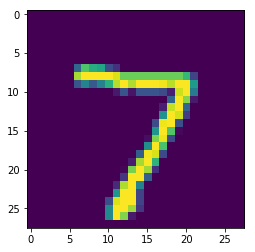

In [6]:
plt.imshow(test_images[0])

<b>Preprocessing the data

In [7]:
train_images = train_images.reshape(60000, 784)
test_images = test_images.reshape(10000, 784)

train_images = train_images / 255.0
test_images = test_images / 255.0

labels = 10
train_labels = np_utils.to_categorical(train_labels, labels)
test_labels = np_utils.to_categorical(test_labels, labels)

<b> Deep Learning Model

In [8]:
model = Sequential()
model.add(Dense(512, input_shape = (784,)))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(120))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(labels))
model.add(Activation('sigmoid'))
model.summary()
adam = adam(0.01)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 120)               61560     
_________________________________________________________________
activation_2 (Activation)    (None, 120)               0         
_________________________________________________________________
dropout_2 (Dropout)  

<b>Compiling the Model

In [9]:
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])


<b>Training the Model

In [10]:
model.fit(train_images, train_labels, batch_size=1000, epochs = 5, validation_data=(test_images, test_labels))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 76us/step - loss: 0.4870 - acc: 0.8528 - val_loss: 0.1351 - val_acc: 0.9583
Epoch 2/5
60000/60000 [==============================] - 4s 69us/step - loss: 0.1650 - acc: 0.9509 - val_loss: 0.1042 - val_acc: 0.9674
Epoch 3/5
60000/60000 [==============================] - 4s 68us/step - loss: 0.1320 - acc: 0.9596 - val_loss: 0.0944 - val_acc: 0.9714
Epoch 4/5
60000/60000 [==============================] - 4s 68us/step - loss: 0.1128 - acc: 0.9652 - val_loss: 0.0905 - val_acc: 0.9718
Epoch 5/5
60000/60000 [==============================] - 4s 68us/step - loss: 0.1056 - acc: 0.9678 - val_loss: 0.0823 - val_acc: 0.9745


<b>Evaluating the Model

In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 71us/step


<b>Making Predictions on the Test Images

In [12]:
predictions = model.predict(test_images)

In [13]:
np.argmax(predictions[0])

7